In [3]:

#                       By: Danyal Khattak 

#%% Libraries used:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import statsmodels.api as sm

#%% 

# (Given) defining the matrices A and B
A = np.array([[1.0000, 0.0135],
              [0.0972, 0.9853]])

B = np.array([-0.0199, -0.1237])

# Defining the relevant elements from A and B
A11 = A[0, 0]
A12 = A[0, 1]
A21 = A[1, 0]
A22 = A[1, 1]
B1 = B[0]
B2 = B[1]

# Defining the provided system of equations for the coefficients as a function
def equations(p):
  eta_ck, eta_kk, eta_cz, eta_kz = p
  eq1 = (eta_kk * (eta_ck*A11 + A12)) - eta_ck
  eq2 = (eta_kz * (eta_ck*A11 + A12)) + eta_cz *0.979*A11 + B1 - eta_cz
  eq3 = (eta_kk * ((eta_ck * A21) + A22)) - 1
  eq4 = (eta_kz * ((eta_cz*A21) + A22) + (eta_cz*0.979*A21) + B2)
  return [eq1, eq2, eq3, eq4]

# Random initial guess for the variables
initial_guess = (0.5, 0.5, 0.5, 0.5)

# Solving the system of equations using the fsolve package
solution = fsolve(equations, initial_guess)

print("eta_ck =", solution[0])
print("eta_kk =", solution[1])
print("eta_cz =", solution[2])
print("eta_kz =", solution[3])



eta_ck = 0.4558893740667107
eta_kk = 0.9712392296334525
eta_cz = 0.5619012623645819
eta_kz = 0.06753439310958868


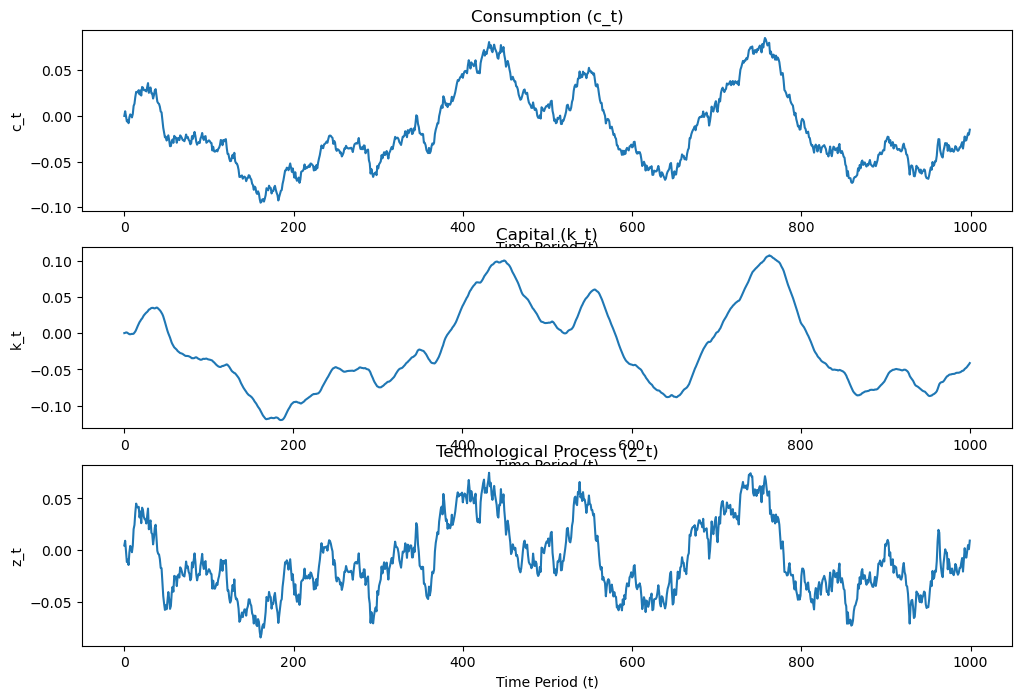

Standard deviation of c_t: 0.041877040583358456
Standard deviation of k_t: 0.057332105384113395
Correlation between c_t and z_t: 0.8870351471335952
Correlation between k_t and z_t: 0.6939894731757125


In [11]:

'''
It is assumed that at every iteration there is an
exogenous shock to the system, with the properties provided. 
These shocks, coupled with the scaling factor (rho) times the value of the technological process 
from the last period determines how z_t will evolve over time. 
Because of the dependence of the consumption and the capital variables on this technological process as 
shown in the system of equations, those two variables will also evolve as z changes over time.
The question that this solution answers is how

'''

# Given values of eta
eta_ck = 0.4562
eta_kk = 0.9712
eta_cz = 0.5629
eta_kz = 0.0675
rho_A = 0.979  # Assuming this value for rho_A

# Parameters for the error term (e_t)
mu = 0
sigma = 0.0072
T = 1000

# generating a sequence of shocks (e_t)
e_t = np.random.normal(loc=mu, scale=sigma, size=T)


# Initializing arrays to store c_t and k_t
c_t = np.zeros(T)
k_t = np.zeros(T+1)
z_t = np.zeros(T)

# Initial values for c_0 and k_0 (you might need to adjust these)
c_t[0] = 0
k_t[0] = 0
z_t[0] = 0

# Since there is no value to calculate the initial value of z_0, it has to be defined outside the loop
z_t[0] = rho_A * z_t[0] + e_t[0]  


# Simulating the sequences for c_t and k_t
for t in range(1, T):
  z_t[t] = rho_A * z_t[t-1] + e_t[t-1] 
  c_t[t] = eta_ck * k_t[t-1] + eta_cz * z_t[t] 
  k_t[t] = eta_kk * k_t[t-1] + eta_kz * z_t[t-1]

# Because the equation for k is in k_t+1 and not k_t, as the others, the loop calculates k upto k_T-1, for this reason, the final value for k_T has to be generated outside the loop. 
k_t[T] = eta_kk * k_t[T-1] + eta_kz * z_t[T-1]



# Plotting the graphs just to see that the simulations are working. REMOVE THIS BEFORE SUBMITTING
plt.figure(figsize=(12, 8))

# Plot for c_t
plt.subplot(3, 1, 1) 
plt.plot(c_t)
plt.title('Consumption (c_t)')
plt.xlabel('Time Period (t)')
plt.ylabel('c_t')

# Plot for k_t
plt.subplot(3, 1, 2)
plt.plot(k_t)
plt.title('Capital (k_t)')
plt.xlabel('Time Period (t)')
plt.ylabel('k_t')

# Plot for z_t
plt.subplot(3, 1, 3)
plt.plot(z_t)
plt.title('Technological Process (z_t)')
plt.xlabel('Time Period (t)')
plt.ylabel('z_t')

plt.show()

# Calculate standard deviations
std_c = np.std(c_t)
std_k = np.std(k_t[:-1])  # Exclude the last element of k_t

# Calculate correlations
corr_c_z = np.corrcoef(c_t, z_t)[0, 1]
corr_k_z = np.corrcoef(k_t[:-1], z_t)[0, 1]  # Exclude the last element of k_t

# Print the results
print("Standard deviation of c_t:", std_c)
print("Standard deviation of k_t:", std_k)
print("Correlation between c_t and z_t:", corr_c_z)
print("Correlation between k_t and z_t:", corr_k_z)

[0.00000000e+00 8.02064952e-03 8.07392908e-03 8.34141763e-03
 8.59070214e-03 8.82252739e-03 9.03761208e-03 9.23664969e-03
 9.42030929e-03 9.58923630e-03 9.74405335e-03 9.88536094e-03
 1.00137382e-02 1.01297436e-02 1.02339157e-02 1.03267735e-02
 1.04088175e-02 1.04805301e-02 1.05423761e-02 1.05948036e-02
 1.06382442e-02 1.06731137e-02 1.06998126e-02 1.07187269e-02
 1.07302280e-02 1.07346737e-02 1.07324083e-02 1.07237634e-02
 1.07090580e-02 1.06885993e-02 1.06626826e-02 1.06315920e-02
 1.05956010e-02 1.05549723e-02 1.05099587e-02 1.04608032e-02
 1.04077392e-02 1.03509910e-02 1.02907744e-02 1.02272962e-02
 1.01607554e-02 1.00913428e-02 1.00192418e-02 9.94462818e-03
 9.86767066e-03 9.78853111e-03 9.70736475e-03 9.62432037e-03
 9.53954058e-03 9.45316204e-03 9.36531564e-03 9.27612671e-03
 9.18571525e-03 9.09419608e-03 9.00167905e-03 8.90826919e-03
 8.81406693e-03 8.71916822e-03 8.62366471e-03 8.52764393e-03
 8.43118939e-03 8.33438077e-03 8.23729404e-03 8.14000159e-03
 8.04257238e-03 7.945072

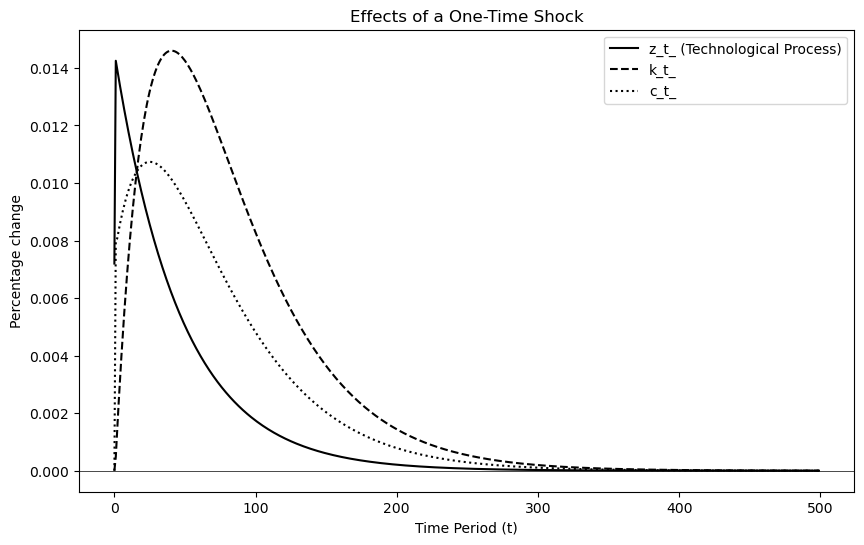

In [15]:
# Given values of eta
eta_ck_ = 0.4562
eta_kk_ = 0.9712
eta_cz_ = 0.5629
eta_kz_ = 0.0675
rho_A_ = 0.979  

# Parameters for the error term (e_t_)
mu = 0
sigma = 0.0072
T = 500

# Generating e_t_ with only one shock
e_t_ = np.zeros(T)
shock_period = 0  # Choose the period for the shock (e.g., t=10)
e_t_[shock_period] = sigma  # One standard deviation shock at the chosen period

# Initializing arrays to store c_t_ and k_t_
c_t_ = np.zeros(T)
k_t_ = np.zeros(T+1)
z_t_ = np.zeros(T)

# Initial values for c_0 and k_0 (you might need to adjust these)
c_t_[0] = 0
k_t_[0] = 0
z_t_[0] = 0

z_t_[0] = rho_A * z_t_[0] + e_t_[0]  


# Simulating the sequences for c_t_ and k_t_
for t in range(1, T):
  z_t_[t] = rho_A_ * z_t_[t-1] + e_t_[t-1] 
  c_t_[t] = eta_ck_ * k_t_[t-1] + eta_cz_ * z_t_[t] 
  k_t_[t] = eta_kk_ * k_t_[t-1] + eta_kz_ * z_t_[t-1]

k_t_[T] = eta_kk_ * k_t_[T-1] + eta_kz_ * z_t_[T-1]

print(c_t_)
print(z_t_)
print(k_t_)

plt.figure(figsize=(10, 6))

# Plot for z_t_ (Technological Process)
plt.plot(z_t_, label='z_t_ (Technological Process)', color='black') 

# Plot for k_t_ (Capital)
plt.plot(k_t_[:-1], label='k_t_', color='black', linestyle='dashed') 

# Plot for c_t_ (Consumption/Labor - assuming it represents labor here)
plt.plot(c_t_, label='c_t_', color='black', linestyle='dotted') 

plt.title('Effects of a One-Time Shock')
plt.xlabel('Time Period (t)')
plt.ylabel('Percentage change')  # You might need to adjust the units
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.show()

In [13]:
# Defining OLS parameters
y = c_t  
X = np.column_stack((k_t[:-1], z_t))
X = sm.add_constant(X)  

# Run the OLS regression
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.562e+07
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:36:55   Log-Likelihood:                 6930.3
No. Observations:                1000   AIC:                        -1.385e+04
Df Residuals:                     997   BIC:                        -1.384e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.796e-06   8.01e-06     -1.222      0.2